In [3]:
import pandas as pd
import numpy as np
store = pd.read_csv('../data/store.csv', index_col='Store')
train = pd.read_csv('../data/train.csv')
df = train.merge(store, how='left', on='Store')
df = df.drop('Customers', axis=1)
df = df.dropna(subset=['Sales'])
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df.dropna(inplace=True)
y=df['Sales']
x=df.drop(columns=['Sales','StateHoliday','StoreType','Assortment','PromoInterval','Date'], axis=1)

pd.get_dummies(y)
pd.get_dummies(x)

xtrain, xtest, ytrain, ytest= train_test_split(x,y)


model = RandomForestRegressor()
model.fit(xtrain,ytrain)

/home/admin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


NameError: name 'RandomForestRegressor' is not defined

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
df=df.dropna()
df=df[df!=0].dropna()
a=df['CompetitionDistance']
b=df['Sales']

lin_reg=LinearRegression()
lin_reg.fit(xtrain,ytrain)

LinearRegression()

In [7]:
lin_reg.intercept_

26131.284580962736

In [8]:
lin_reg.coef_



array([-6.10630793e-02, -8.79592860e+01,  5.42151451e+03,  2.13764365e+03,
        4.32306938e+01,  4.09023914e-03, -4.30182953e+01, -4.54783216e+00,
        3.91082722e-11,  1.07743300e+01, -8.20797077e+00])

In [9]:
metric()

NameError: name 'plt' is not defined

In [10]:
df

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
6693,2013-01-07,371.0,1.0,11134.0,1.0,1.0,0,1.0,d,c,1970.0,7.0,2009.0,1.0,45.0,2014.0,"Feb,May,Aug,Nov"
6764,2013-01-07,305.0,1.0,5277.0,1.0,1.0,0,1.0,c,c,2470.0,2.0,2005.0,1.0,31.0,2013.0,"Mar,Jun,Sept,Dec"
6767,2013-01-07,302.0,1.0,5361.0,1.0,1.0,0,1.0,d,c,2190.0,12.0,2007.0,1.0,9.0,2011.0,"Mar,Jun,Sept,Dec"
6769,2013-01-07,300.0,1.0,7431.0,1.0,1.0,0,1.0,a,c,120.0,4.0,2009.0,1.0,1.0,2012.0,"Jan,Apr,Jul,Oct"
6773,2013-01-07,296.0,1.0,10197.0,1.0,1.0,0,1.0,a,a,9580.0,5.0,2007.0,1.0,45.0,2014.0,"Feb,May,Aug,Nov"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637743,2014-07-31,705.0,4.0,12561.0,1.0,1.0,0,1.0,a,a,4140.0,9.0,2012.0,1.0,18.0,2011.0,"Feb,May,Aug,Nov"
637758,2014-07-31,759.0,4.0,10745.0,1.0,1.0,0,1.0,a,a,110.0,11.0,2012.0,1.0,31.0,2013.0,"Feb,May,Aug,Nov"
637766,2014-07-31,748.0,4.0,7616.0,1.0,1.0,0,1.0,d,a,2380.0,3.0,2010.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct"
637768,2014-07-31,743.0,4.0,4527.0,1.0,1.0,0,1.0,a,a,6710.0,11.0,2003.0,1.0,14.0,2012.0,"Jan,Apr,Jul,Oct"


<Figure size 1080x1440 with 0 Axes>

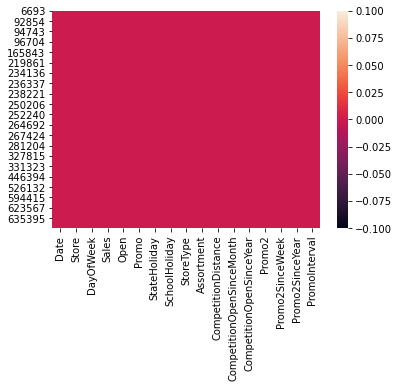

<Figure size 1080x1440 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
nulls = df.isnull()
sns.heatmap(nulls)
plt.figure(figsize=(15,20 ))


In [12]:
y=df['Sales']
x=df.drop(columns=['Sales','StateHoliday','StoreType','Assortment','PromoInterval','Date'], axis=1)

pd.get_dummies(y)
pd.get_dummies(x)

xtrain, xtest, ytrain, ytest= train_test_split(x,y)


model = RandomForestClassifier(n_estimators=9)
model.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=9)

In [13]:
import xgboost

model=xgboost.XGBRegressor()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)


In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

In [21]:

metric(ypred,ytest)


19.113865014928546

In [18]:
[ytest == 0].value_counts()

AttributeError: 'list' object has no attribute 'value_counts'

In [24]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

metric(ypred,ytest)

41.103417934863465

In [26]:
lin_reg.coef_

array([-6.10630793e-02, -8.79592860e+01,  5.42151451e+03,  2.13764365e+03,
        4.32306938e+01,  4.09023914e-03, -4.30182953e+01, -4.54783216e+00,
        3.91082722e-11,  1.07743300e+01, -8.20797077e+00])